# Data Exploration, Analysis & Interpretations part 2

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import skimage as sk

In [2]:
#Raw_cell_count_Dataframes(A:32xmag,B:7xMag,C115xMag)
dfA= pd.read_csv('/Users/alb/PROJECTS/EXPORTS/Data_Analysis_Final_Project/MS263_Final_Project_AB/raw_data/EXPORTS_gel_cell_cnts_25x.csv')
dfB=pd.read_csv('/Users/alb/PROJECTS/EXPORTS/Data_Analysis_Final_Project/MS263_Final_Project_AB/raw_data/EXPORTS_Lg_Rhizaria_7x.csv')
dfC=pd.read_csv('/Users/alb/PROJECTS/EXPORTS/Data_Analysis_Final_Project/MS263_Final_Project_AB/raw_data/EXPORTS_gel_cell_cnts_115x.csv')
#Carbon_per_Cell
dfCarbon_md= pd.read_csv('/Users/alb/PROJECTS/EXPORTS/Data_Analysis_Final_Project/MS263_Final_Project_AB/processed_data/EXPORTS_Carbon_per_Cell.csv')


# Advanced work with Pandas DataFrames

### Lg_organisms_counts_DF (1 of 2 whole gel counts)
##### Script Tasks:             -Isolate metadata, create variables to easily access for flux calculations and plotting
    -Remove data from taxa which won't be used in this analysis

    -Combine counts for Acantharia B and Acantharia_red as they are the same organism, Add rows to dataframe
    containing summed taxa

In [3]:
Acell_counts_and_type = dfA.loc[dfA.Infrakingdom != 'metadata']
Acell_counts = Acell_counts_and_type.drop(['Infrakingdom','Phylum','Class','Order_Suborder','Category'],axis=1).astype('float')

Ametadata = dfA.loc[dfA.Infrakingdom == 'metadata']
Ametadata_numbers = Ametadata.drop(['Infrakingdom','Phylum','Class','Order_Suborder','Category'],axis=1) 
Ametadata.drop([4],axis=0)
Am2perfield=Ametadata_numbers.loc[Ametadata.Category=='m2perfield'].astype('float')

Am2perfield.loc[1][0:10]
Adays=Ametadata_numbers.loc[Ametadata.Category=='Elapsed_Time_(days)'] 
Adays=Adays.astype('float')
Adays.loc[2][0:10]
Acells_per_m2=Acell_counts.divide(Am2perfield.loc[1])

Acell_counts.index=Acell_counts_and_type['Category']


depth=Ametadata.loc[Ametadata.Category=='True_Depth_(m)']
Epochs=Ametadata_numbers.loc[Ametadata.Category=='Epoch']
Epoch_1=np.where(Epochs=='1')
Epoch_2=np.where(Epochs=='2')
Epoch_3=np.where(Epochs=='3')
E1_traps=Epochs.columns[Epoch_1[1]]
E2_traps=Epochs.columns[Epoch_2[1]]
E3_traps=Epochs.columns[Epoch_3[1]]
E1_traps=Epochs.columns[Epoch_1[1]]
E2_traps=Epochs.columns[Epoch_2[1]]
E3_traps=Epochs.columns[Epoch_3[1]]

E1_depths=depth[E1_traps].astype(float).values[0]
E2_depths=depth[E2_traps].astype(float).values[0]
E3_depths=depth[E3_traps].astype(float).values[0]



In [4]:
#Readying Carbon Dataframe
dfCarbon_md
dfCarbon_md.index=dfCarbon_md['iv']#making one row of taxonomy the index names
dfCarbon1=dfCarbon_md.drop(['Rhizo_Lg_fragment'],axis=0)#Dropping_Rhizo_Frag_Row
#dfCarbon=dfCarbon_md.drop(['Foram'],axis=0)#Dropping_Rhizo_Frag_Row
dfCarbon_No_only=dfCarbon1.drop(['i','ii','iii','iv','V_um3','pgC'],axis=1)
dfCarbon=dfCarbon_No_only['ugC']
dfCarbon3=dfCarbon.drop(['Nass_F'],axis=0)

In [5]:
Lg_25x_counts_prior_to_summed_taxa=Acell_counts.drop(['Foraminifera','Spumellaria_A','Rhizosolenia__Fragment','Spumellaria_D','Coscinodiscus','Spumellaria_Tiny_C'],axis=0)
Lg_25x_counts_prior_to_summed_taxa.astype('float')
#
Acanth_B=(Acell_counts.loc['Acantharia_B']+Acell_counts.loc['Acantharia_red'])
#adding new row to df-------Lg_25x_counts_prior_to_summed_taxa.loc['Acanth_B']=Acanth_B
Lg_25x_counts_prior_to_summed_taxa.loc['Acanth_B']=Acanth_B
Lg_25x_counts=Lg_25x_counts_prior_to_summed_taxa.drop(['Acantharia_B','Acantharia_red','Acantharia_B_small'],axis=0).astype('float')

###  Large_Rhizaria_counts_DF (2 of 2 whole gel counts)
##### Script Tasks: 

    -Reorganize Phaeodaria at the Family level instead of Category (e.g. Aulosphaeridae...Coelodendridae)

     -Remove extraneous/redundant taxa data, Add rows to dataframe containing summed taxa

In [8]:
dfB
dfB1= dfB.drop(['Infrakingdom','Phylum','Subphylum','Class','Order','Family','Category'],axis=1)
dfB1.index=dfB['Family']
dfB2=dfB1.drop(['metadata'],axis=0).astype('float')
dfB3=dfB2.drop(['Litharachnium sp.','Cladococcus_Lg'],axis=0)
#
Aulo=dfB3.loc[['Aulosphaeridae_iii','Aulosphaeridae_vi','Aulosphaeridae_vii','Aulosphaeridae_iv','Cannosphaeridae_v']]
Aulo_sum2=Aulo.sum()
Aulo_sum2
#
Coelo_sum=dfB3.loc[['Coelodendridae_viii','Coelodendridae']].sum().astype('float')
Coelo_sum[:4]

dfB3.loc['Coelodendridae']=Coelo_sum
dfB3.loc['Aulosphaeridae__']=Aulo_sum2
Rhizaria_counts_DF=dfB3.drop(['Coelodendridae_viii','Aulosphaeridae_iii',
                'Aulosphaeridae_vi','Aulosphaeridae_vii','Aulosphaeridae_iv','mystery','Cannosphaeridae_v'])


### Combined Lg_organisms_counts_DF & Large_Rhizaria_counts_DF
#### Script Tasks: Cell Flux, Cell Flux Uncertainties
    -Combine whole gel counts into one dataframe (can do this because meters squared per field is the same)

    -Calculate cell flux: how many cells were sinking at a specific depth point, per square meter, per day.

    -Flux uncertainties: The counting uncertainties for each organism, carried through to flux numbers,
     defined as the square root of the original number of cells counted, divided by the size of the counting
     field (m-2) divided by the number of days the traps collected for.

In [9]:
#create combined lg cell dataframe(Count_Df_for_Lg_cells) that has final list of organisms only
gels=[Lg_25x_counts,Rhizaria_counts_DF]
Count_Df_for_Lg_cells=pd.concat(gels)#Count_Df_for_Lg_cells
#
Lg_cells_per_m2=Count_Df_for_Lg_cells.divide(Am2perfield.loc[1])
Lg_cell_flux=Lg_cells_per_m2.divide(Adays.loc[2])

Lg_cell_flux1=Lg_cell_flux.rename({'Aulosphaeridae__':'Aulosphaeridae', 'Tuscaroridae?': 'Challengeridae', 'Aulocanthidae(red)':'Aulocanthidae',
       'Castanellidae_i':'Castanellidae','Spumellaria_D':'Spum_D', 'Spumellaria_Tiny_C':'Spum_C', 'Spumellaria_Girded':'Phaeoconchidae','Spumellaria_A': 'Spum_A_lg', 'Spumellaria_C':'Spum_C', 'Spumellaria_Tiny_A':'Spum_A_Sm',
       'Spumellaria_Tiny_B':'Tiny_B_star'}).astype(float)

#Uncertainties_Df_for_Lg_cells
Lg_cnting_unc=np.sqrt(Count_Df_for_Lg_cells)

In [10]:
#Flux_Uncertainties_Df_for_Lg_cells
#unc_replaced_large= counting uncertainties (both propped and unpropped of all large cells (25x and 7x))
Lg_cells_unc_per_fields=Lg_cnting_unc.divide(Ametadata_numbers.iloc[0].astype(float))
Lg_cells_unc_per_m2=Lg_cells_unc_per_fields.divide(Ametadata_numbers.iloc[1].astype(float))
Lg_unc_flux=Lg_cells_unc_per_m2.divide(Ametadata_numbers.iloc[2].astype(float))
#Lg_unc_flux
#

### 115x Organisms count DataFrame
##### Script Tasks: 
    Rename DF index labels for better agreement

    Combine counts for certain taxa with high counting uncertainties as indiviudals, and for certain taxa which
    are the same.

In [11]:
C115x_counts_and_type = dfC.loc[dfC.group != 'metadata']
C115x_counts = C115x_counts_and_type.drop(['group','group.1','Category'],axis=1).astype(float)
C115x_counts.index=C115x_counts_and_type['Category']
Cmetadata = dfC.loc[dfC.group == 'metadata']
Cmetadata_numbers = Cmetadata.drop(['group','group.1','Category'],axis=1) #columns
Cm2perfield=Cmetadata_numbers.loc[Cmetadata.Category=='m2perfield']
Cm2perfield=Cm2perfield.astype('float') #ensure that all is read as float
Cm2perfield.loc[1][0:10]#deletes col of '1' or '2' and instead having RR labels as index values
#
Cdays=Cmetadata_numbers.loc[Cmetadata.Category=='Elapsed_Time_(days)'].astype('float') #look in metadata_numbers where Elapsed_Time_(days)'
Cdays.loc[2][0:10] #days values are in row location 2 
Ccells_per_m2=C115x_counts.divide(Cm2perfield.loc[1])

#
P=C115x_counts.loc[['Pennate_A','Pennate_B']]
P_N=P.sum()
C115x_counts.loc['P_N']=P_N
#
N=C115x_counts.loc[['Nassellaria_A','Nassellaria_B','Nassellaria_C','Nassellaria_D','Nassellaria_E']]
Nass_A_B_C_D_E=N.sum()
C115x_counts.loc['Nass_A_B_C_D_E']=Nass_A_B_C_D_E

SpuD=C115x_counts.loc[['Spumellaria_D','Spumellaria_E','Spumellaria_G']]
Spum_D=SpuD.sum()
C115x_counts.loc['Spum_D']=Spum_D

c=C115x_counts.drop(['Tintinnid_A','Pennate_Tiny','Foraminifera','Asterolampra','Eucampia','Noctiluca','Prorocentrum','Dictyocha','Cylindrotheca','Planktoniella','Athecate','Dinoflagellate_typeA','Tintinnid_Dictyocysta','Pennate_A','Pennate_B','Pennate_C','Thecate','Nassellaria_A','Nassellaria_B','Nassellaria_A','Nassellaria_C','Acantharia_B','Acantharia_large','Nassellaria_D','Nassellaria_E','Nassellaria_G'],axis=0)
c1=c.drop(['Spumellaria_D','Acantharia_small','Spumellaria_G','Spumellaria_E','Spumellaria_F','Spumellaria_H'])
cells_115x=c1.rename({'Emiliania_(A)':'Emiliania', 'Helicosphaera_(B)':'Helicosphaera', 'Rhabdosphaera': 'Rhabdosphaera', 'Chaetocerous':'Chaetocerous',
       'Corethron':'Corethron', 'Coscinodiscus':'Coscinodiscus', 'Fragilariopsis':'Fragilariopsis', 'Thalassiosira':'Thalassiosira',
       'Melosira': 'Melosira', 'Planktoniella':'Planktoniella', 'Gonyaulax':'Gonyaulax', 'Scripsiella':'Scripsiella', 'Tripos':'Tripos',
       'Foraminifera':'Foram', 'Spumellaria_A': 'Spum_A_lg', 'Spumellaria_C':'Spum_C', 'Spumellaria_Tiny_A':'Spum_A_Sm',
       'Spumellaria_Tiny_B':'Tiny_B_star', 'P_N':'P_N', 'Nass_A_B_C_D_E':'Nass_A_B_C_D_E', 'Spum_D':'Spum_D'}).astype(float)

#cells_115x


In [12]:
#Cell cnts DF for 115x: 'cells_115x'
#Cell_flux_for_115x_cells:'cells_115x_flux'
Ccells_per_m2=cells_115x.divide(Cm2perfield.loc[1])
cells_115x_flux=Ccells_per_m2.divide(Adays.loc[2])
#Cell_counting_Uncertainty_for_115x_cells: 'C115x_unc'
C115x_unc=np.sqrt(cells_115x)
#cells 115x_UNC FLUX:
C115x_unc_fields_per_m2=(C115x_unc.divide(Cmetadata_numbers.iloc[0].astype(float))).divide(Cmetadata_numbers.iloc[1].astype(float))
cells_115x_unc_flux=C115x_unc_fields_per_m2.divide(Cmetadata_numbers.iloc[2].astype(float))

### All Cell Fluxes and Cell Flux Uncertainties:

In [13]:
All_cell_flux_uncs=pd.concat([cells_115x_unc_flux,Lg_unc_flux])
All_cell_flux_uncs=All_cell_flux_uncs.reindex(dfCarbon3.index.to_list())
#
All_cell_fluxes=pd.concat([cells_115x_flux,Lg_cell_flux1])
All_cell_fluxes=All_cell_fluxes.reindex(dfCarbon3.index.to_list())

# Incorporating Carbon Estimates for Organisms
### Preliminary
#### Data Exploration and Plotting
        For details on how carbon estimates were derived for all gel trap organisms see Git Repository
        ./Extended_methodology/

In [14]:
# Formatting DataFrames and calculating Carbon flux of solo cells
dfCarbon_md
dfCarbon_md.index=dfCarbon_md['iv']#making one row of taxonomy the index names
dfCarbon1=dfCarbon_md.drop(['Rhizo_Lg_fragment'],axis=0)#Dropping_Rhizo_Frag_Row
#dfCarbon=dfCarbon_md.drop(['Foram'],axis=0)#Dropping_Rhizo_Frag_Row
dfCarbon_No_only=dfCarbon1.drop(['i','ii','iii','iv','V_um3','pgC'],axis=1)
dfCarbon=dfCarbon_No_only['ugC']
dfCarbon3=dfCarbon.drop(['Nass_F'],axis=0)
#
All_cell_fluxes=All_cell_fluxes.reindex(dfCarbon3.index.to_list())

#Carbon flux DFs & Uncertainty DFs for Carbon Fluxes:
carbon_fluxes=All_cell_fluxes.multiply(dfCarbon3,axis=0)
carbon_flux_df=carbon_fluxes.reindex(dfCarbon3.index.to_list())
uncerts_4_carbon_flux_df=All_cell_flux_uncs.multiply(dfCarbon3,axis=0)
                   #All_cell_flux_uncs=pd.concat([cells_115x_unc_flux,Lg_unc_flux])
#Carbon flux provided by Rhizaria
RhizC=carbon_flux_df.iloc[0:15]
#Carbon flux provided by Phytoplankton
PlankC=carbon_flux_df.iloc[15:31]
#
RhizC_uncs=uncerts_4_carbon_flux_df.iloc[0:15]
PlankC_uncs=uncerts_4_carbon_flux_df.iloc[15:31]


# Propagating Uncertainty by Addition

In [15]:
#Summed Carbon Flux Dataframes & Summed Uncertainties for Carbon Flux DFs
carbon_flux_df_sum=carbon_flux_df.sum()
uncerts_4_carbon_flux_df_sum=np.sqrt((uncerts_4_carbon_flux_df**2).sum(axis=0))
#
r_sum=RhizC.sum()
p_sum=PlankC.sum()
#
RhizC_uncs_sum=np.sqrt((RhizC_uncs**2).sum())
PlankC_uncs_sum=np.sqrt((PlankC_uncs**2).sum())

In [16]:
#Normalizing to Max value within each Epoch
E1df_C=carbon_flux_df[E1_traps]
E2df_C=carbon_flux_df[E2_traps]
E3df_C=carbon_flux_df[E3_traps]

mx1=E1df_C.max(axis=1)# Epoch 1 carbon fluxes: show the max flux value for each taxon.
E1_normalized=E1df_C.divide(mx1,axis='rows')

mx2=E2df_C.max(axis=1)  # selectE1df
E2_normalized=E2df_C.divide(mx2,axis='rows')

mx3=E3df_C.max(axis=1)  # selectE1df
E3_normalized=E3df_C.divide(mx3,axis='rows')


NtaxaE1_100_avg_C=((E1_normalized.RR1+E1_normalized.RR6+E1_normalized.RR7)/3).dropna(axis=0)
NtaxaE1_150_avg_C=E1_normalized.RR8.dropna(axis=0)
NtaxaE1_200_avg_C=((E1_normalized.RR9+E1_normalized.RR10)/2).dropna(axis=0)
NtaxaE1_330_avg_C=((E1_normalized.RR4+E1_normalized.RR11)/2).dropna(axis=0)
NtaxaE1_500_C=E1_normalized.RR5.dropna(axis=0)
Ntaxadf_avgE1_C=[NtaxaE1_100_avg_C,NtaxaE1_150_avg_C,NtaxaE1_200_avg_C,NtaxaE1_330_avg_C,NtaxaE1_500_C]
#
NtaxaE2_100_avg_C=((E2_normalized.RR23+E2_normalized.RR28+E2_normalized.RR29)/3).dropna(axis=0)
NtaxaE2_150_avg_C=((E2_normalized.RR30+E2_normalized.RR24)/2).dropna(axis=0)
NtaxaE2_200_avg_C=((E2_normalized.RR25+E2_normalized.RR31+E2_normalized.RR32)/3).dropna(axis=0)
NtaxaE2_330_avg_C=((E2_normalized.RR33+E2_normalized.RR26)/2).dropna(axis=0)
NtaxaE2_500_C=E2_normalized.RR27.dropna(axis=0)
Ntaxadf_avgE2_C=[NtaxaE2_100_avg_C,NtaxaE2_150_avg_C,NtaxaE2_200_avg_C,NtaxaE2_330_avg_C,NtaxaE2_500_C]
#
NtaxaE3_100_avg_C=((E3_normalized.RR53+E3_normalized.RR54+E3_normalized.RR58)/3).dropna(axis=0)
NtaxaE3_150_avg_C=((E3_normalized.RR55+E3_normalized.RR59)/2).dropna(axis=0)
NtaxaE3_200_avg_C=((E3_normalized.RR56+E3_normalized.RR60/2)).dropna(axis=0)
NtaxaE3_330_avg_C=((E3_normalized.RR57+E3_normalized.RR61)/2).dropna(axis=0)
NtaxaE3_500_C=E3_normalized.RR62.dropna(axis=0)
Ntaxadf_avgE3_C=[NtaxaE3_100_avg_C,NtaxaE3_150_avg_C,NtaxaE3_200_avg_C,NtaxaE3_330_avg_C,NtaxaE3_500_C]

In [17]:
C_E1_100_avg=((carbon_flux_df_sum.loc['RR1']+carbon_flux_df_sum.loc['RR6']+carbon_flux_df_sum.loc['RR7'])/3)
C_E1_150_avg=carbon_flux_df_sum.loc['RR8']
C_E1_200_avg=((carbon_flux_df_sum.loc['RR9']+carbon_flux_df_sum.loc['RR10'])/2)
C_E1_330_avg=((carbon_flux_df_sum.loc['RR4']+carbon_flux_df_sum.loc['RR11'])/2)
C_E1_500=carbon_flux_df_sum.loc['RR5']
#
C_E2_100_avg=((carbon_flux_df_sum.loc['RR23']+carbon_flux_df_sum.loc['RR28']+carbon_flux_df_sum.loc['RR29'])/3)
C_E2_150_avg=((carbon_flux_df_sum.loc['RR30']+carbon_flux_df_sum.loc['RR24'])/2)
C_E2_200_avg=((carbon_flux_df_sum.loc['RR25']+carbon_flux_df_sum.loc['RR31']+carbon_flux_df_sum.loc['RR32'])/3)
C_E2_330_avg=((carbon_flux_df_sum.loc['RR33']+carbon_flux_df_sum.loc['RR26'])/2)
C_E2_500=carbon_flux_df_sum.loc['RR27']
#
C_E3_100_avg=((carbon_flux_df_sum.loc['RR53']+carbon_flux_df_sum.loc['RR54']+carbon_flux_df_sum.loc['RR58'])/3)
C_E3_150_avg=((carbon_flux_df_sum.loc['RR55']+carbon_flux_df_sum.loc['RR59'])/2)
C_E3_200_avg=((carbon_flux_df_sum.loc['RR56']+carbon_flux_df_sum.loc['RR60']/2))
C_E3_330_avg=((carbon_flux_df_sum.loc['RR57']+carbon_flux_df_sum.loc['RR61'])/2)
C_E3_500=carbon_flux_df_sum.loc['RR62']
###
depth_bins=[E1_depths[0],E1_depths[5],E1_depths[6],E1_depths[1],E1_depths[2]]
C_df_avgE1=[C_E1_100_avg,C_E1_150_avg,C_E1_200_avg,C_E1_330_avg,C_E1_500]

C_df_avgE2=[C_E2_100_avg,C_E2_150_avg,C_E2_200_avg,C_E2_330_avg,C_E2_500]

C_df_avgE3=[C_E3_100_avg,C_E3_150_avg,C_E3_200_avg,C_E3_330_avg,C_E3_500]

<IPython.core.display.Javascript object>


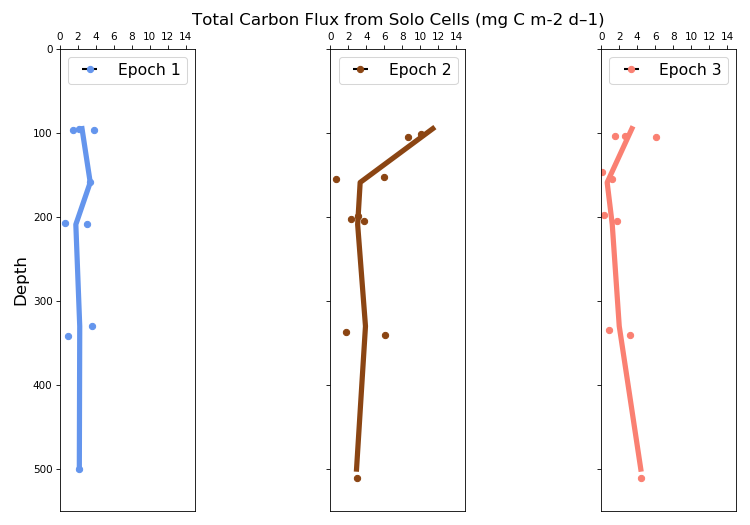

In [18]:
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labeltop'] = True
plt.figure(figsize=[10,7])
plt.subplot(1,3,1)
plt.errorbar(carbon_flux_df_sum[E1_traps],E1_depths,xerr=uncerts_4_carbon_flux_df_sum[E1_traps],color='cornflowerblue',fmt='o',ms=6,label='Epoch 1',ecolor='black',elinewidth=2)

plt.plot(C_df_avgE1,depth_bins,'-',lw=5,color='cornflowerblue')
plt.ylim(550,0)
plt.xlim(0,15000)
plt.xticks([0,2000,4000,6000,8000,10000,12000,14000],labels=['0','2','4','6','8','10','12','14'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['0','100','200','300','400','500'])
plt.ylabel(('Depth'),fontsize=16)
plt.legend(fontsize=15)
#
plt.subplot(1,3,2)
plt.title(('Total Carbon Flux from Solo Cells (mg C m-2 d–1)'),fontsize=16)
plt.errorbar(carbon_flux_df_sum[E2_traps],E2_depths,xerr=uncerts_4_carbon_flux_df_sum[E2_traps],color='saddlebrown',fmt='o',ms=6,label='Epoch 2',ecolor='black',elinewidth=2)

plt.plot(C_df_avgE2,depth_bins,'-',lw=5,color='saddlebrown')
plt.ylim(550,0)
plt.xlim(0,15000)
plt.xticks([0,2000,4000,6000,8000,10000,12000,14000],labels=['0','2','4','6','8','10','12','14'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['','','','','',''])
plt.legend(fontsize=15)
#
plt.subplot(1,3,3)
plt.errorbar(carbon_flux_df_sum[E3_traps],E3_depths,xerr=uncerts_4_carbon_flux_df_sum[E3_traps],color='salmon',fmt='o',ms=6,label='Epoch 3',ecolor='black',elinewidth=2)
plt.plot(C_df_avgE3,depth_bins,'-',lw=5,color='salmon')
plt.ylim(550,0)
plt.xlim(0,15000)
plt.xticks([0,2000,4000,6000,8000,10000,12000,14000,],labels=['0','2','4','6','8','10','12','14'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['','','','','',''])
plt.legend(fontsize=15)
plt.tight_layout()
#plt.savefig('/Users/alb/PROJECTS/EXPORTS/EXPORTS_1/EXPORTS_plots_jpegs/Carbon_fluxes/Total Carbon Flux from Solo Cells (mg C m-2 d–1).jpeg')
            

In [23]:

#r_sum=RhizC.sum()
C_rE1_100_avg=((r_sum.loc['RR1']+r_sum.loc['RR6']+r_sum.loc['RR7'])/3)
C_rE1_150_avg=r_sum.loc['RR8']
C_rE1_200_avg=((r_sum.loc['RR9']+r_sum.loc['RR10'])/2)
C_rE1_330_avg=((r_sum.loc['RR4']+r_sum.loc['RR11'])/2)
C_rE1_500=r_sum.loc['RR5']
#
C_rE2_100_avg=((r_sum.loc['RR23']+r_sum.loc['RR28']+r_sum.loc['RR29'])/3)
C_rE2_150_avg=((r_sum.loc['RR30']+r_sum.loc['RR24'])/2)
C_rE2_200_avg=((r_sum.loc['RR25']+r_sum.loc['RR31']+r_sum.loc['RR32'])/3)
C_rE2_330_avg=((r_sum.loc['RR33']+r_sum.loc['RR26'])/2)
C_rE2_500=r_sum.loc['RR27']
#
C_rE3_100_avg=((r_sum.loc['RR53']+r_sum.loc['RR54']+r_sum.loc['RR58'])/3)
C_rE3_150_avg=((r_sum.loc['RR55']+r_sum.loc['RR59'])/2)
C_rE3_200_avg=((r_sum.loc['RR56']+r_sum.loc['RR60']/2))
C_rE3_330_avg=((r_sum.loc['RR57']+r_sum.loc['RR61'])/2)
C_rE3_500=r_sum.loc['RR62']

C_df_rhiz_avgE1=[C_rE1_100_avg,C_rE1_150_avg,C_rE1_200_avg,C_rE1_330_avg,C_rE1_500]
C_df_rhiz_avgE2=[C_rE2_100_avg,C_rE2_150_avg,C_rE2_200_avg,C_rE2_330_avg,C_rE2_500]
C_df_rhiz_avgE3=[C_rE3_100_avg,C_rE3_150_avg,C_rE3_200_avg,C_rE3_330_avg,C_rE3_500]


mmol_rE1_100_avg=((r_sum.loc['RR1']+r_sum.loc['RR6']+r_sum.loc['RR7'])/3)/12000
mmol_rE1_150_avg=r_sum.loc['RR8']/12000
mmol_rE1_200_avg=((r_sum.loc['RR9']+r_sum.loc['RR10'])/2)/12000
mmol_rE1_330_avg=((r_sum.loc['RR4']+r_sum.loc['RR11'])/2)/12000
mmol_rE1_500=r_sum.loc['RR5']/12000
#
mmol_rE2_100_avg=((r_sum.loc['RR23']+r_sum.loc['RR28']+r_sum.loc['RR29'])/3)/12000
mmol_rE2_150_avg=((r_sum.loc['RR30']+r_sum.loc['RR24'])/2)/12000
mmol_rE2_200_avg=((r_sum.loc['RR25']+r_sum.loc['RR31']+r_sum.loc['RR32'])/3)/12000
mmol_rE2_330_avg=((r_sum.loc['RR33']+r_sum.loc['RR26'])/2)/12000
mmol_rE2_500=r_sum.loc['RR27']/12000
#
mmol_rE3_100_avg=((r_sum.loc['RR53']+r_sum.loc['RR54']+r_sum.loc['RR58'])/3)/12000
mmol_rE3_150_avg=((r_sum.loc['RR55']+r_sum.loc['RR59'])/2)/12000
mmol_rE3_200_avg=((r_sum.loc['RR56']+r_sum.loc['RR60']/2))/12000
mmol_rE3_330_avg=((r_sum.loc['RR57']+r_sum.loc['RR61'])/2)/12000
mmol_rE3_500=r_sum.loc['RR62']/12000

mmol_df_rhiz_avgE1=[mmol_rE1_100_avg,mmol_rE1_150_avg,mmol_rE1_200_avg,mmol_rE1_330_avg,mmol_rE1_500]
mmol_df_rhiz_avgE2=[mmol_rE2_100_avg,mmol_rE2_150_avg,mmol_rE2_200_avg,mmol_rE2_330_avg,mmol_rE2_500]
mmol_df_rhiz_avgE3=[mmol_rE3_100_avg,mmol_rE3_150_avg,mmol_rE3_200_avg,mmol_rE3_330_avg,mmol_rE3_500]
print('Rhizaria 100m Avg Epoch 1 (mmol C m^-2 day^-1)')
print(mmol_rE1_100_avg)
print('')
print('Rhizaria 500m Epoch 1 (mmol C m^-2 day^-1)')
print(mmol_rE1_500)
print('')
print('Rhizaria 100m Avg Epoch 2 (mmol C m^-2 day^-1)')
print(mmol_rE2_100_avg)
print('')
print('Rhizaria 500m Epoch 2 (mmol C m^-2 day^-1)')
print(mmol_rE2_500)
print('')
print('Rhizaria 100m Avg Epoch 3 (mmol C m^-2 day^-1)')
print(mmol_rE3_100_avg)
print('')
print('Rhizaria 500m Epoch 3 (mmol C m^-2 day^-1)')
print(mmol_rE3_500)
print('')

Rhizaria 100m Avg Epoch 1 (mmol C m^-2 day^-1)
0.10728985346647753

Rhizaria 500m Epoch 1 (mmol C m^-2 day^-1)
0.07257740595322004

Rhizaria 100m Avg Epoch 2 (mmol C m^-2 day^-1)
0.09018894675083763

Rhizaria 500m Epoch 2 (mmol C m^-2 day^-1)
0.17665307904619168

Rhizaria 100m Avg Epoch 3 (mmol C m^-2 day^-1)
0.028799510392554618

Rhizaria 500m Epoch 3 (mmol C m^-2 day^-1)
0.1913020934828889



In [24]:
#Phytoplankton Carbon fluxes averages by depth, Epochs Distinct
#Units are ug C m^-2 day^-1
p_sum=PlankC.sum()
C_pE1_100_avg=((p_sum.loc['RR1']+p_sum.loc['RR6']+p_sum.loc['RR7'])/3)
C_pE1_150_avg=p_sum.loc['RR8']
C_pE1_200_avg=((p_sum.loc['RR9']+p_sum.loc['RR10'])/2)
C_pE1_330_avg=((p_sum.loc['RR4']+p_sum.loc['RR11'])/2)
C_pE1_500=p_sum.loc['RR5']
#
C_pE2_100_avg=((p_sum.loc['RR23']+p_sum.loc['RR28']+p_sum.loc['RR29'])/3)
C_pE2_150_avg=((p_sum.loc['RR30']+p_sum.loc['RR24'])/2)
C_pE2_200_avg=((p_sum.loc['RR25']+p_sum.loc['RR31']+p_sum.loc['RR32'])/3)
C_pE2_330_avg=((p_sum.loc['RR33']+p_sum.loc['RR26'])/2)
C_pE2_500=p_sum.loc['RR27']
#
C_pE3_100_avg=((p_sum.loc['RR53']+p_sum.loc['RR54']+p_sum.loc['RR58'])/3)
C_pE3_150_avg=((p_sum.loc['RR55']+p_sum.loc['RR59'])/2)
C_pE3_200_avg=((p_sum.loc['RR56']+p_sum.loc['RR60']/2))
C_pE3_330_avg=((p_sum.loc['RR57']+p_sum.loc['RR61'])/2)
C_pE3_500=p_sum.loc['RR62']

#
C_df_phyto_avgE1=[C_pE1_100_avg,C_pE1_150_avg,C_pE1_200_avg,C_pE1_330_avg,C_pE1_500]
C_df_phyto_avgE2=[C_pE2_100_avg,C_pE2_150_avg,C_pE2_200_avg,C_pE2_330_avg,C_pE2_500]
C_df_phyto_avgE3=[C_pE3_100_avg,C_pE3_150_avg,C_pE3_200_avg,C_pE3_330_avg,C_pE3_500]

#

mmol_pE1_flux=p_sum[E1_traps].astype(float).values/12011
mmol_pE2_flux=p_sum[E2_traps].astype(float).values/12011
mmol_pE3_flux=p_sum[E3_traps].astype(float).values/12011

mmol_pE1_100_avg=((p_sum.loc['RR1']+p_sum.loc['RR6']+p_sum.loc['RR7'])/3)/12011
mmol_pE1_150_avg=p_sum.loc['RR8']/12000
mmol_pE1_200_avg=((p_sum.loc['RR9']+p_sum.loc['RR10'])/2)/12011 
mmol_pE1_330_avg=((p_sum.loc['RR4']+p_sum.loc['RR11'])/2)/12011
mmol_pE1_500=p_sum.loc['RR5']/12000
#
mmol_pE2_100_avg=((p_sum.loc['RR23']+p_sum.loc['RR28']+p_sum.loc['RR29'])/3)/12011
mmol_pE2_150_avg=((p_sum.loc['RR30']+p_sum.loc['RR24'])/2)/12011
mmol_pE2_200_avg=((p_sum.loc['RR25']+p_sum.loc['RR31']+p_sum.loc['RR32'])/3)/12011
mmol_pE2_330_avg=((p_sum.loc['RR33']+p_sum.loc['RR26'])/2)/12011
mmol_pE2_500=p_sum.loc['RR27']/12011
#
mmol_pE3_100_avg=((p_sum.loc['RR53']+p_sum.loc['RR54']+p_sum.loc['RR58'])/3)/12011
mmol_pE3_150_avg=((p_sum.loc['RR55']+p_sum.loc['RR59'])/2)/12011
mmol_pE3_200_avg=((p_sum.loc['RR56']+p_sum.loc['RR60']/2))/12011
mmol_pE3_330_avg=((p_sum.loc['RR57']+p_sum.loc['RR61'])/2)/12011
mmol_pE3_500=p_sum.loc['RR62']/12011

#
mmol_df_phyto_avgE1=[mmol_pE1_100_avg,mmol_pE1_150_avg,mmol_pE1_200_avg,mmol_pE1_330_avg,mmol_pE1_500]
mmol_df_phyto_avgE2=[mmol_pE2_100_avg,mmol_pE2_150_avg,mmol_pE2_200_avg,mmol_pE2_330_avg,mmol_pE2_500]
mmol_df_phyto_avgE3=[mmol_pE3_100_avg,mmol_pE3_150_avg,mmol_pE3_200_avg,mmol_pE3_330_avg,mmol_pE3_500]
print('Phytoplankton 100m Avg Epoch 1 (mmol C m^-2 day^-1)')
print(mmol_pE1_100_avg)
print('')
print('Phytoplankton 500m Epoch 1 (mmol C m^-2 day^-1)')
print(mmol_pE1_500)
print('')
print('Phytoplankton 100m Avg Epoch 2 (mmol C m^-2 day^-1)')
print(mmol_pE2_100_avg)
print('')
print('Phytoplankton 500m Epoch 2 (mmol C m^-2 day^-1)')
print(mmol_pE2_500)
print('')
print('Phytoplankton 100m Avg Epoch 3 (mmol C m^-2 day^-1)')
print(mmol_pE3_100_avg)
print('')
print('Phytoplankton 500m Epoch 3 (mmol C m^-2 day^-1)')
print(mmol_pE3_500)
print('')

Phytoplankton 100m Avg Epoch 1 (mmol C m^-2 day^-1)
0.09909911853834674

Phytoplankton 500m Epoch 1 (mmol C m^-2 day^-1)
0.10893711629858772

Phytoplankton 100m Avg Epoch 2 (mmol C m^-2 day^-1)
0.8570759163363443

Phytoplankton 500m Epoch 2 (mmol C m^-2 day^-1)
0.06471655625472336

Phytoplankton 100m Avg Epoch 3 (mmol C m^-2 day^-1)
0.25520777044474574

Phytoplankton 500m Epoch 3 (mmol C m^-2 day^-1)
0.17513942711295064



<IPython.core.display.Javascript object>


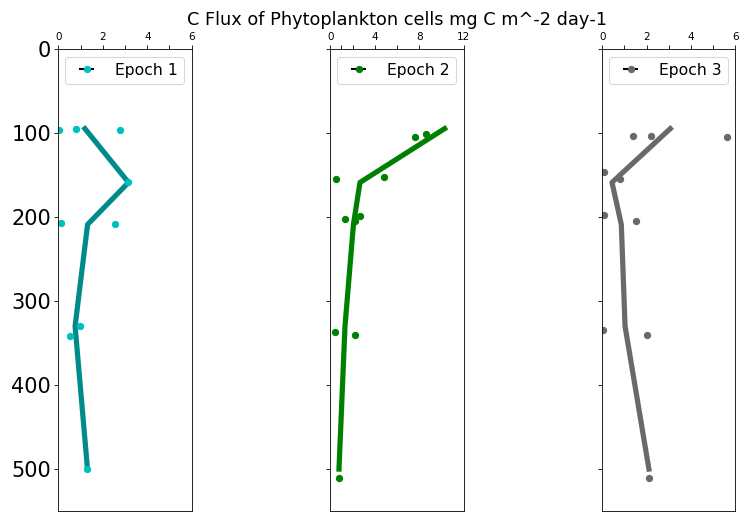

In [25]:
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labeltop'] = True
plt.figure(figsize=[10,7])
plt.subplot(1,3,1)

plt.errorbar(p_sum[E1_traps],E1_depths,xerr=PlankC_uncs_sum[E1_traps],color='c',fmt='o',label='Epoch 1',ecolor='black',elinewidth=2)
plt.plot(C_df_phyto_avgE1,depth_bins,'-',lw=5,color='darkcyan')
plt.ylim(550,0)
plt.xlim(0,6000)
plt.xticks([0,1000,2000,3000,4000,5000,6000],labels=['0','','2','','4','','6'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['0','100','200','300','400','500'],size=20)
plt.legend(fontsize=15)
#
plt.subplot(1,3,2)
plt.title( 'C Flux of Phytoplankton cells mg C m^-2 day-1',size=17)
plt.errorbar(p_sum[E2_traps],E2_depths,xerr=PlankC_uncs_sum[E2_traps],color='green',fmt='o',label='Epoch 2',ecolor='black',elinewidth=2)
plt.plot(C_df_phyto_avgE2,depth_bins,'-',lw=5,color='green')

plt.ylim(550,0)
plt.xlim(0,12000)
plt.xticks([0,2000,4000,6000,8000,1000,12000],labels=['0','','4','','8','','12'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['','','','','',''])
plt.legend(fontsize=15)
#plt.title('Total Cell Flux')
#
plt.subplot(1,3,3)
plt.errorbar(p_sum[E3_traps],E3_depths,xerr=PlankC_uncs_sum[E3_traps],color='dimgrey',fmt='o',label='Epoch 3',ecolor='black',elinewidth=2)
plt.plot(C_df_phyto_avgE3,depth_bins,'-',lw=5,color='dimgrey')
plt.ylim(550,0)
plt.xlim(0,6000)
plt.xticks([0,1000,2000,3000,4000,5000,6000],labels=['0','','2','','4','','6'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['','','','','',''])
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('/Users/alb/PROJECTS/EXPORTS/EXPORTS_1/EXPORTS_plots_jpegs/carbon_fluxes/C Flux of Phytoplankton cells mg C')

In [ ]:
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labeltop'] = True
plt.figure(figsize=[10,7])
plt.subplot(1,3,1)

plt.errorbar(r_sum[E1_traps],E1_depths,xerr=RhizC_uncs_sum[E1_traps],color='mediumorchid',fmt='o',label='Epoch 1',ecolor='black',elinewidth=2)
plt.plot(C_df_rhiz_avgE1,depth_bins,'-',lw=5,color='darkmagenta')
plt.ylim(550,0)
plt.xlim(0,4000)
plt.xticks([0,1000,2000,3000,4000],labels=['0','1','2','3','4'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['0','100','200','300','400','500'],size=20)
plt.legend(fontsize=15)
#
plt.subplot(1,3,2)
plt.title( 'C Flux of Rhizaria cells mg C m^-2 day-1',size=17)
plt.errorbar(r_sum[E2_traps],E2_depths,xerr=RhizC_uncs_sum[E2_traps],color='darksalmon',fmt='o',label='Epoch 2',ecolor='black',elinewidth=2)
plt.plot(C_df_rhiz_avgE2,depth_bins,'-',lw=5,color='sienna')

plt.ylim(550,0)
plt.xlim(0,4000)
plt.xticks([0,1000,2000,3000,4000],labels=['0','1','2','3','4'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['','','','','',''])
plt.legend(fontsize=15)
#plt.title('Total Cell Flux')
#
plt.subplot(1,3,3)
plt.errorbar(r_sum[E3_traps],E3_depths,xerr=RhizC_uncs_sum[E3_traps],color='gold',fmt='o',label='Epoch 3',ecolor='black',elinewidth=2)
plt.plot(C_df_rhiz_avgE3,depth_bins,'-',lw=5,color='darkkhaki')
plt.ylim(550,0)
plt.xlim(0,4000)
plt.xticks([0,1000,2000,3000,4000],labels=['0','1','2','3','4'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['','','','','',''])
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('/Users/alb/PROJECTS/EXPORTS/EXPORTS_1/EXPORTS_plots_jpegs/carbon_fluxes/Rhizaria_C_Flux.jpeg')

<IPython.core.display.Javascript object>


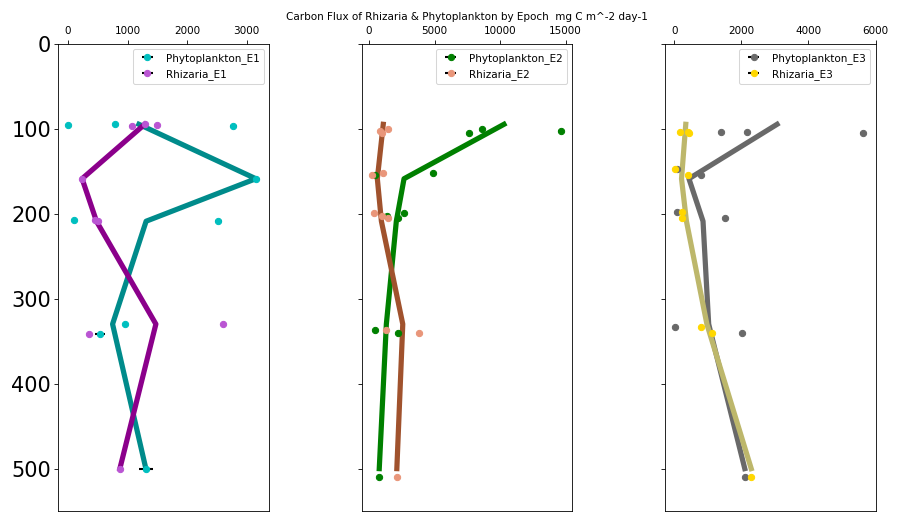

In [26]:
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labeltop'] = True
plt.figure(figsize=[12,7])
plt.subplot(1,3,1)

plt.errorbar(p_sum[E1_traps],E1_depths,xerr=PlankC_uncs_sum[E1_traps],color='c',fmt='o',label='Phytoplankton_E1',ecolor='black',elinewidth=2)
plt.plot(C_df_phyto_avgE1,depth_bins,'-',lw=5,color='darkcyan')
plt.errorbar(r_sum[E1_traps],E1_depths,xerr=RhizC_uncs_sum[E1_traps],color='mediumorchid',fmt='o',label='Rhizaria_E1',ecolor='black',elinewidth=2)
plt.plot(C_df_rhiz_avgE1,depth_bins,'-',lw=5,color='darkmagenta')
plt.ylim(550,0)
#plt.xlim(0,6000)
#plt.xticks([0,1000,2000,3000,4000,5000,6000],labels=['0','','2','','4','','6'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['0','100','200','300','400','500'],size=20)
plt.legend(fontsize=10)
#
plt.subplot(1,3,2)
plt.title( 'Carbon Flux of Rhizaria & Phytoplankton by Epoch  mg C m^-2 day-1',size=10)
plt.errorbar(p_sum[E2_traps],E2_depths,xerr=PlankC_uncs_sum[E2_traps],color='green',fmt='o',label='Phytoplankton_E2',ecolor='black',elinewidth=2)
plt.plot(C_df_phyto_avgE2,depth_bins,'-',lw=5,color='green')
plt.errorbar(r_sum[E2_traps],E2_depths,xerr=RhizC_uncs_sum[E2_traps],color='darksalmon',fmt='o',label='Rhizaria_E2',ecolor='black',elinewidth=2)
plt.plot(C_df_rhiz_avgE2,depth_bins,'-',lw=5,color='sienna')
plt.ylim(550,0)
#plt.xlim(0,12000)
#plt.xticks([0,2000,4000,6000,8000,1000,12000],labels=['0','','4','','8','','12'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['','','','','',''])
plt.legend(fontsize=10)
#plt.title('Total Cell Flux')
#
plt.subplot(1,3,3)
plt.errorbar(p_sum[E3_traps],E3_depths,xerr=PlankC_uncs_sum[E3_traps],color='dimgrey',fmt='o',label='Phytoplankton_E3',ecolor='black',elinewidth=2)
plt.plot(C_df_phyto_avgE3,depth_bins,'-',lw=5,color='dimgrey')
plt.errorbar(r_sum[E3_traps],E3_depths,xerr=RhizC_uncs_sum[E3_traps],color='gold',fmt='o',label='Rhizaria_E3',ecolor='black',elinewidth=2)
plt.plot(C_df_rhiz_avgE3,depth_bins,'-',lw=5,color='darkkhaki')
plt.ylim(550,0)
#plt.xlim(0,6000)
#plt.xticks([0,1000,2000,3000,4000,5000,6000],labels=['0','','2','','4','','6'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['','','','','',''])
plt.legend(fontsize=10)
plt.tight_layout()
#plt.savefig('/Users/alb/PROJECTS/EXPORTS/EXPORTS_1/EXPORTS_plots_jpegs/carbon_fluxes/Carbon_Rhiz&Pplankton.jpeg')
            

In [ ]:

plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labeltop'] = True
plt.figure(figsize=[11,7])
plt.subplot(1,3,1)

plt.errorbar(p_sum[E1_traps],E1_depths,xerr=PlankC_uncs_sum[E1_traps],color='c',fmt='o',ecolor='black',elinewidth=2)
plt.plot(C_df_phyto_avgE1,depth_bins,'-',lw=5,color='darkcyan')
plt.errorbar(r_sum[E1_traps],E1_depths,xerr=RhizC_uncs_sum[E1_traps],color='gold',fmt='o',ecolor='black',elinewidth=2)
plt.plot(C_df_rhiz_avgE1,depth_bins,'-',lw=5,color='darkkhaki')
plt.ylim(550,0)
plt.xlim(0,6000)
plt.xticks([0,1000,2000,3000,4000,5000,6000],labels=['0','','2','','4','','6'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['0','100','200','300','400','500'],size=20)
#plt.legend(fontsize=10)
plt.title('Epoch 1')
#
plt.subplot(1,3,2)
#plt.title( 'Carbon Flux of Rhizaria & Phytoplankton by Epoch  mg C m^-2 day-1',size=10)
plt.errorbar(p_sum[E2_traps],E2_depths,xerr=PlankC_uncs_sum[E2_traps],color='c',fmt='o',label='Phytoplankton samples',ecolor='black',elinewidth=2)
plt.plot(C_df_phyto_avgE2,depth_bins,'-',lw=5,color='darkcyan',label='Phytoplankton Avg')
plt.errorbar(r_sum[E2_traps],E2_depths,xerr=RhizC_uncs_sum[E2_traps],color='gold',fmt='o',label='Rhizaria samples',ecolor='black',elinewidth=2)
plt.plot(C_df_rhiz_avgE2,depth_bins,'-',lw=5,color='darkkhaki',label='Rhizaria Avg')
plt.ylim(550,0)
plt.xlim(0,12000)
plt.xticks([0,2000,4000,6000,8000,1000,12000],labels=['0','','4','','8','','12'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['','','','','',''])
plt.legend(fontsize=10)
plt.title('Epoch 2')
#
plt.subplot(1,3,3)
plt.errorbar(p_sum[E3_traps],E3_depths,xerr=PlankC_uncs_sum[E3_traps],color='c',fmt='o',label='Phytoplankton_E3',ecolor='black',elinewidth=2)
plt.plot(C_df_phyto_avgE3,depth_bins,'-',lw=5,color='darkcyan')
plt.errorbar(r_sum[E3_traps],E3_depths,xerr=RhizC_uncs_sum[E3_traps],color='gold',fmt='o',ecolor='black',elinewidth=2)
plt.plot(C_df_rhiz_avgE3,depth_bins,'-',lw=5,color='darkkhaki')
plt.ylim(550,0)
plt.xlim(0,6000)
plt.xticks([0,1000,2000,3000,4000,5000,6000],labels=['0','','2','','4','','6'])#Turning into milligrams of Carbon
plt.yticks([0,100,200,300,400,500],labels=['','','','','',''])
#plt.legend(fontsize=10)
plt.title('Epoch 3')
plt.tight_layout()
plt.savefig('/Users/alb/PROJECTS/EXPORTS/EXPORTS_1/EXPORTS_plots_jpegs/Carbon Flux of Rhizaria & Phytoplankton by Epoch  mg C m^-2 day-1.jpeg')

## Future work
### 1) Use dataframes and plots generated with this project to analyze possible and/or likely export mechanisms for individually sinking cells:


<IPython.core.display.Javascript object>


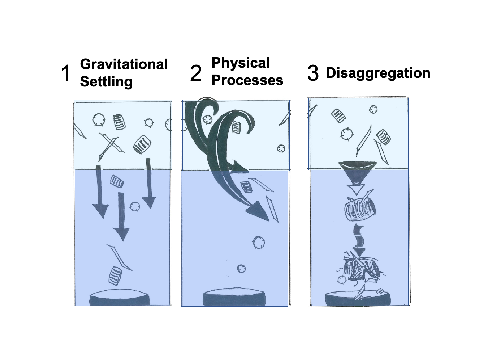

(-0.5, 1029.5, 695.5, -0.5)

In [27]:
mechs=sk.io.imread('/Users/alb/PROJECTS/EXPORTS/Data_Analysis_Final_Project/MS263_Final_Project_AB/processed_data/mechanisms..png')
plt.figure()
plt.imshow(mechs)
plt.axis('Off')

### Figure 3. Potential mechanisms of cell transport from the Epipelagic to Mesopelagic: 1. Gravitational settling: cells sink directly on their own 2. Physical Processes : cells are subducted or laterally advected. 3. Disaggregation: cells sink within particles initially, then degrade and release cells. Individual cells in this study may have been transported by one or several of these mechanisms.






### 2) Analyze and Interpret Carbon Flux Data. Compare Carbon Flux from Indiviudal Cells to total POC flux
    (collected at the same time on the same trap platform)
### 3) Compare my data to:
  #### - community composition and abundance data collected from surface
  #### - large rhizaria data from Underwater Vision Profiler (UVP)
  #### - physical and chemical oceanographic data collected by wirewalker


# References:


Alldredge, A. L. and M. W. Silver. 1988. "Characteristics, dynamics and significance of marine snow." Progress in Oceanography. 20:41-82.

Ducklow, Hugh, et al. 2001. “Upper Ocean Carbon Export and the Biological Pump” Oceanography, vol. 14, no. 4, , pp. 50–58.

Durkin, Colleen A., et al. 2015. “Observations of Carbon Export by Small Sinking Particles in the Upper Mesopelagic.” Marine Chemistry, vol. 175, , pp. 72–81.

Eppley, Richard W., and Bruce J. Peterson. 1979 “Particulate Organic Matter Flux and                                          Planktonic New Production in the Deep Ocean.” Nature, vol. 282, no. 5740, , pp. 677–680. 
Kiørboe, Thomas. 2001. “Formation and Fate of Marine Snow: Small-Scale Processes with
Large- Scale Implications.” Scientia Marina, vol. 65, no. S2, , pp. 57–71. 

Martin, J. H., Knauer, G. A., Karl, D. M. & Broenkow, W. W. 1987. "VERTEX: carbon cycling in the northeast Pacific." Deep-Sea Res. 34, 267–285.

Menden-Deuer, S. and Lessard, E. J. 2000. "Carbon to volume relationships for dinoflagellates, diatoms, and other protist plankton." Limnol. Oceanogr., 45, 569–579.

Owens, S. A., K. O. Buesseler, C. Lamborg, J. 2013. "A new time series of particle export from neutrally buoyant sediments traps at the Bermuda Atlantic Time-series Study site." Deep Sea Res. Part Oceanogr. Res. Pap. 72: 34–47 

Siegel, D. A. et al. 2016. "Prediction of the export and fate of global ocean net primary production: the EXPORTS science plan." Front. Mar. Sci. 3, 22.

Stukel MR, Biard T, Krause J, Ohman MD., 2018. "Large Phaeodaria in the twilight zone: Their role in the carbon cycle." Limnol Oceanogr. 63(6):2579-2594

Wiedmann, Ingrid, et al. 2014. “Potential Drivers of Sinking Particle's Size Spectra and Vertical Flux of Particulate Organic Carbon (POC): Turbulence, Phytoplankton, and Zooplankton.” Journal of Geophysical Research: Oceans, vol. 119, no. 10, pp. 6900–6917.

Volk, T., and Hoffert, M. I., 1985, Ocean carbon pumps: Analysis of relative strengths and efficiencies in ocean-driven atmospheric CO2 changes, In: “The Carbon Cycle and Atmospheric CO2: Natural Variations Archean to Present,” E. Sundquist and W. S. Broecker, eds., Geophysical Monograph 32, American Geophysical Union.
